In [11]:
!pip install hdbscan
!pip install sentence_transformers
!pip install umap-learn

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.preprocessing import Normalizer

from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
import hdbscan

from sklearn import metrics


from sentence_transformers import SentenceTransformer
import umap

In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
test

,text,category
0,How do I locate my card?,card_arrival
1,"I still have not received my new card, I order...",card_arrival
2,I ordered a card but it has not arrived. Help ...,card_arrival
3,Is there a way to know when my card will arrive?,card_arrival
4,My card has not arrived yet.,card_arrival
...,...,...
3075,"If i'm not in the UK, can I still get a card?",country_support
3076,How many countries do you support?,country_support
3077,What countries do you do business in?,country_support
3078,What are the countries you operate in.,country_support


In [5]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000,
                                   min_df=1,
                                   max_df=0.85,
                                   ngram_range=(1, 2))

In [6]:
X_tfidf = tfidf_vectorizer.fit_transform(test['text'])

In [7]:
X_tfidf.shape

(3080, 1000)

In [8]:
tfidf_matrix=X_tfidf.toarray()

In [9]:
umap_model = umap.UMAP(n_neighbors=10,n_components=5, metric='cosine')
umap_reduced = umap_model.fit_transform(tfidf_matrix)

In [13]:
hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=18)
clusters = hdbscan_model.fit_predict(umap_reduced)

In [14]:
clusters

array([12, -1, 26, ..., 10, -1, -1])

In [19]:
 max(clusters)

33

In [15]:
test['topic'] = clusters
test

,text,category,topic
0,How do I locate my card?,card_arrival,12
1,"I still have not received my new card, I order...",card_arrival,-1
2,I ordered a card but it has not arrived. Help ...,card_arrival,26
3,Is there a way to know when my card will arrive?,card_arrival,-1
4,My card has not arrived yet.,card_arrival,26
...,...,...,...
3075,"If i'm not in the UK, can I still get a card?",country_support,-1
3076,How many countries do you support?,country_support,10
3077,What countries do you do business in?,country_support,10
3078,What are the countries you operate in.,country_support,-1


<ipython-input-17-135b2f340926>:8: UserWarning: 
The palette list has fewer values (33) than needed (35) and will cycle, which may produce an uninterpretable plot.
  scatter = sns.scatterplot(x=umap_reduced[:, 0], y=umap_reduced[:, 1],hue=test['topic'],legend='full', alpha=0.8,palette=custom_palette)


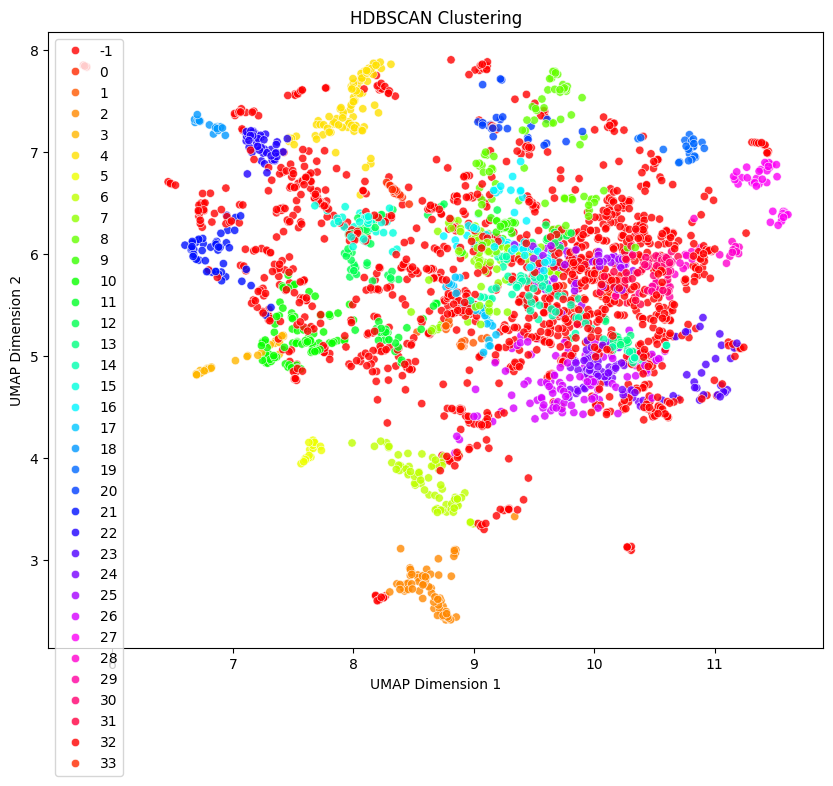

In [17]:
hues = np.linspace(0, 1, 33, endpoint=False)
saturation = 0.9
value = 0.9

custom_palette = [plt.cm.hsv(h) for h in hues]

plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(x=umap_reduced[:, 0], y=umap_reduced[:, 1],hue=test['topic'],legend='full', alpha=0.8,palette=custom_palette)
plt.title('HDBSCAN Clustering')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend()
plt.show()